<a href="https://colab.research.google.com/github/logisticPM/6140/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving APDDataset3.xlsx to APDDataset3.xlsx


In [ ]:
#Question1
#  Step 1: Data Apcquistion
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
import warnings
# Specify the file path
file_path = "/content/APDDataset3.xlsx"

# Read the Excel file into a DataFrame
data = pd.read_excel(file_path)
# Display basic information about the dataset about number of samples and features
print("BASIC DATASET INFORMATION:")
print(f"   Numbaer of samples (rows): {data.shape[0]}")
print(f"   Number of features (columns): {data.shape[1]}")
print(f"   Total cells: {data.shape[0] * data.shape[1]}")

print("\nDATA HEAD:")
# Display the first few rows of the dataset
print(data.head())
print("\nDATA INFO")
# Display basic information about the dataset
print(data.info())

null_counts = data.isnull().sum()
print("\nNumber of null values in each column:")
print(null_counts)
#Categorical column check
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns:")
print(categorical_columns)

discrete_count = []
continuous_count = []
print("\nFeature Analysis")
for column in data.columns:
    # Skip index column for classification
    if column == 'Unnamed: 0':
        continue

    dtype = str(data[column].dtype)
    unique_count = data[column].nunique()

    # Classification logic
    if unique_count == 2 and set(data[column].dropna().unique()).issubset({0, 1}):
        # Binary features (0/1) logic
        classification = "Discrete"
        discrete_count.append(column)
    else:
      # High variable numerical logic
      classification = "Continuous"
      continuous_count.append(column)

    print(f"{column:<15} {dtype:<12} {unique_count:<15} {classification}")
#For the binary feature, there should be only 2 unique variation in this kind of feature.
#Since there is no categorical column, so this kind of discrete analysis is not needed.
display(Markdown(r"""### Brief Analysis

1. **Samples & Features**
   - The table above shows the number of rows (samples), columns (features), and total cells in the dataset.

2. **Null Values**
   - The `NULL COUNTS` table lists the number and percentage of missing values for each column.
   - Use this information to decide whether to fill or drop missing data.

3. **Categorical Columns**
   - If you see `Index([], dtype='object')`, it means no columns were detected as `object` or `category` type.

4. **Feature Classification**
   - The classification rule: only 0/1 binary features are considered **Discrete**, and all others are considered **Continuous**.
"""))

BASIC DATASET INFORMATION:
   Numbaer of samples (rows): 102
   Number of features (columns): 26
   Total cells: 2652

DATA HEAD:
   Unnamed: 0  Gender_M   Age       TC     P     L    E  ESRh   ESRo    Hb  \
0           0         0   NaN   9800.0  56.0  40.0  4.0  16.0   30.0  10.8   
1           1         1   NaN  10500.0  54.0  40.0  6.0   9.0   15.0  11.0   
2           2         0  42.0   7500.0  66.0  28.0  6.0  22.0   40.0   7.0   
3           3         0  33.0   7100.0  48.0  44.0  8.0  13.0   25.0  11.0   
4           4         0   NaN   9900.0  77.0  17.0  6.0  70.0  130.0  10.5   

   ...  MCHC     ASO     RA    CRP   RBS  Urea  Creatinine  Calcium  \
0  ...   NaN  121.00  11.97   7.37   NaN   NaN         NaN      NaN   
1  ...   NaN   88.00  10.00   1.50   NaN   NaN         0.9      NaN   
2  ...   NaN  151.00  10.00    NaN   NaN   NaN         NaN      NaN   
3  ...   NaN   66.12  10.00    NaN   NaN   NaN         NaN      NaN   
4  ...  30.0   90.00  10.00  92.65  96.0  22.0

### Brief Analysis

1. **Samples & Features**  
   - The table above shows the number of rows (samples), columns (features), and total cells in the dataset.

2. **Null Values**  
   - The `NULL COUNTS` table lists the number and percentage of missing values for each column.  
   - Use this information to decide whether to fill or drop missing data.

3. **Categorical Columns**  
   - If you see `Index([], dtype='object')`, it means no columns were detected as `object` or `category` type.

4. **Feature Classification**  
   - The classification rule: only 0/1 binary features are considered **Discrete**, and all others are considered **Continuous**.  


STEP 1: LOADING AND EXPLORING OUR DATA
Dataset size: 102 rows (patients) and 26 columns (measurements)

Our columns (measurements):
   1. Unnamed: 0
   2. Gender_M
   3. Age
   4. TC
   5. P
   6. L
   7. E
   8. ESRh
   9. ESRo
   10. Hb
   11. RBC
   12. Abs
   13. PC
   14. PCV
   15. MCV
   16. MCH
   17. MCHC
   18. ASO
   19. RA
   20. CRP
   21. RBS
   22. Urea
   23. Creatinine
   24. Calcium
   25. Uric_Acid
   26. Label

First 5 patients' data:
   Unnamed: 0  Gender_M   Age       TC     P     L    E  ESRh   ESRo    Hb  \
0           0         0   NaN   9800.0  56.0  40.0  4.0  16.0   30.0  10.8   
1           1         1   NaN  10500.0  54.0  40.0  6.0   9.0   15.0  11.0   
2           2         0  42.0   7500.0  66.0  28.0  6.0  22.0   40.0   7.0   
3           3         0  33.0   7100.0  48.0  44.0  8.0  13.0   25.0  11.0   
4           4         0   NaN   9900.0  77.0  17.0  6.0  70.0  130.0  10.5   

   ...  MCHC     ASO     RA    CRP   RBS  Urea  Creatinine  Calcium  \
0

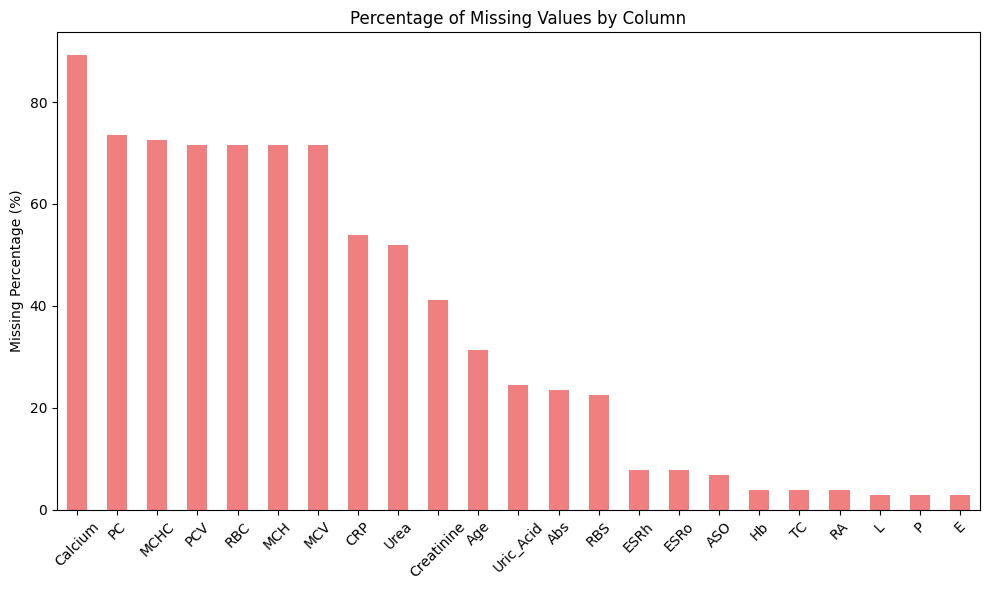


Analysis:
   Total missing values: 830
   Features with missing data: 23
   This is normal in medical data - tests aren't always performed

STEP 3: CHECKING FOR DUPLICATE RECORDS
Removed index column for duplicate checking
Duplicate analysis:
   Total rows in dataset: 102
   Duplicate rows found: 0
   EXCELLENT: No duplicate rows found!

Why duplicates matter:
   They can make our model think there are more examples than there really are
   They can happen due to data entry errors
   It's usually safe to remove exact duplicates

STEP 4: STATISTICAL DESCRIPTION
We have 25 numerical features to analyze.

Basic Statistics for each feature:
   (This shows: count, mean, std, min, 25%, 50%, 75%, max)
       Gender_M    Age        TC      P      L      E   ESRh    ESRo     Hb  \
count    102.00  70.00     98.00  99.00  99.00  99.00  94.00   94.00  98.00   
mean       0.33  50.90   8843.88  58.95  34.33   6.77  18.82   34.20  10.45   
std        0.47  12.14   1926.43   7.88   7.41   1.71  12.

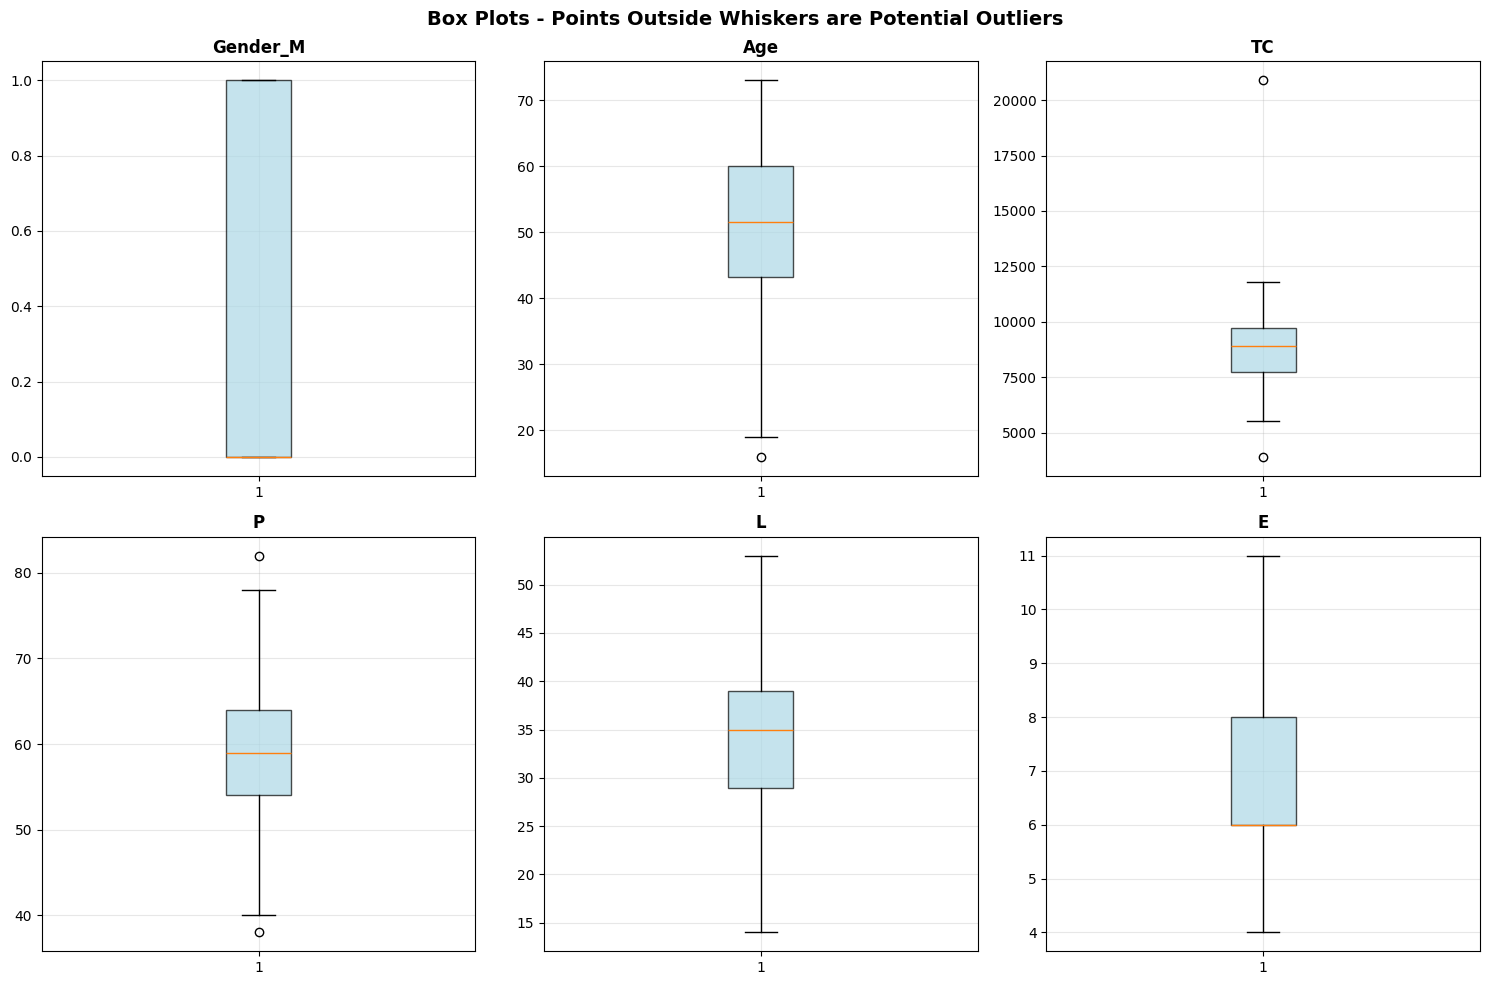


Outlier Analysis (using Box Plot method):
Gender_M        |   0 outliers (  0.0%) | LOW
Age             |   1 outliers (  1.4%) | LOW
TC              |   2 outliers (  2.0%) | LOW
P               |   2 outliers (  2.0%) | LOW
L               |   0 outliers (  0.0%) | LOW
E               |   0 outliers (  0.0%) | LOW

Box Plot Explanation:
   The 'box' shows where 50% of the data lies (25% to 75%)
   The line in the box is the median (50%)
   'Whiskers' extend to show the normal range
   Points outside whiskers are potential outliers
   In medical data, outliers might be errors OR genuine extreme cases

STEP 6: OUTLIER DETECTION USING Z-SCORE
Z-Score Method Explanation:
   Z-score = (value - mean) / standard deviation
   Z-score = 0: Value is exactly at the average
   Z-score = 1: Value is 1 standard deviation from average
   Z-score > 3: Very unusual value (considered outlier)

Z-Score Analysis for same features:
Gender_M        |   0 outliers (  0.0%) | Max Z:  1.41 | LOW
Age        

In [ ]:
#Quesiton 2.1
import pandas as pd          # Import pandas for data manipulation
import numpy as np           # Import numpy for mathematical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns        # Import seaborn for better-looking plots
from scipy import stats     # Import scipy for statistical analysis

print("=" * 50)
print("STEP 1: LOADING AND EXPLORING OUR DATA")
print("=" * 50)

# Step 1: Load the dataset
# Reading the medical dataset APDDataset3.xlsx provided by the professor
df = pd.read_excel('APDDataset3.xlsx')

# Create 'data' variable for compatibility with subsequent code
data = df.copy()

# Let's first see what our data looks like
print(f"Dataset size: {df.shape[0]} rows (patients) and {df.shape[1]} columns (measurements)")
print(f"\nOur columns (measurements):")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print(f"\nFirst 5 patients' data:")
print(df.head())

# =============================================================================
# STEP 2: CHECK FOR MISSING VALUES
# =============================================================================

print("\n" + "=" * 50)
print("STEP 2: CHECKING FOR MISSING VALUES")
print("=" * 50)

# Calculate missing values for each column (this is the first step required by the assignment)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a table to organize missing value information
missing_data = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})

# Only show columns with missing values, sorted by missing count
missing_data = missing_data[missing_data['Missing_Count'] > 0]
missing_data = missing_data.sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("Columns with missing values:")
    print(missing_data.round(2))

    # Create a bar chart to visualize missing value distribution (professor emphasized visualization)
    plt.figure(figsize=(10, 6))
    missing_data['Missing_Percentage'].plot(kind='bar', color='lightcoral')
    plt.title('Percentage of Missing Values by Column')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nAnalysis:")
    print(f"   Total missing values: {missing_values.sum()}")
    print(f"   Features with missing data: {len(missing_data)}")
    print(f"   This is normal in medical data - tests aren't always performed")
else:
    print("Great! No missing values found.")

# =============================================================================
# STEP 3: CHECK FOR DUPLICATES
# =============================================================================

print("\n" + "=" * 50)
print("STEP 3: CHECKING FOR DUPLICATE RECORDS")
print("=" * 50)

# First remove the useless index column (if it exists) since it's meaningless for duplicate detection
if 'Unnamed: 0' in df.columns:
    df_check = df.drop('Unnamed: 0', axis=1)
    print("Removed index column for duplicate checking")
else:
    df_check = df.copy()

# Check for duplicate records (second step required by assignment)
duplicates = df_check.duplicated().sum()

print(f"Duplicate analysis:")
print(f"   Total rows in dataset: {len(df)}")
print(f"   Duplicate rows found: {duplicates}")

if duplicates > 0:
    percentage = (duplicates/len(df))*100
    print(f"   Percentage of duplicates: {percentage:.2f}%")

    if percentage > 5:
        print("   HIGH: Many duplicates found - need to remove them")
    elif percentage > 1:
        print("   MODERATE: Some duplicates found - should remove them")
    else:
        print("   LOW: Few duplicates found - can remove them")
else:
    print("   EXCELLENT: No duplicate rows found!")

print("\nWhy duplicates matter:")
print("   They can make our model think there are more examples than there really are")
print("   They can happen due to data entry errors")
print("   It's usually safe to remove exact duplicates")

# =============================================================================
# STEP 4: STATISTICAL DESCRIPTION (Assignment Requirement)
# =============================================================================

print("\n" + "=" * 50)
print("STEP 4: STATISTICAL DESCRIPTION")
print("=" * 50)

# Find all numerical columns (only numerical types can calculate statistics)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove index column from numerical list
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

print(f"We have {len(numerical_cols)} numerical features to analyze.")
print("\nBasic Statistics for each feature:")
print("   (This shows: count, mean, std, min, 25%, 50%, 75%, max)")
print("=" * 80)

# Use describe() function to get the statistics required by the assignment:
# mean, std(standard deviation), min, max, 25%, 50%, 75% percentiles
stats_summary = df[numerical_cols].describe()
print(stats_summary.round(2))

print("\nWhat these numbers mean:")
print("   count: How many non-missing values")
print("   mean: Average value")
print("   std: How spread out the values are (standard deviation)")
print("   min/max: Smallest and largest values")
print("   25%, 50%, 75%: Quartiles (divide data into four parts)")
print("   50% = median (middle value when sorted)")

# =============================================================================
# STEP 5: OUTLIER DETECTION USING BOX PLOTS
# =============================================================================

print("\n" + "=" * 50)
print("STEP 5: OUTLIER DETECTION USING BOX PLOTS")
print("=" * 50)

# Select first 6 features for box plots (otherwise too many plots would be unclear)
features_to_plot = numerical_cols[:6]
print(f"Creating box plots for first {len(features_to_plot)} features:")
for i, feature in enumerate(features_to_plot, 1):
    print(f"   {i}. {feature}")

# Create 2x3 subplots for box plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()  # Convert 2D array to 1D for easier iteration

for i, feature in enumerate(features_to_plot):
    # Create box plot for each feature
    box_data = df[feature].dropna()  # Remove missing values first
    axes[i].boxplot(box_data, patch_artist=True)
    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

    # Color the boxes to make them look better
    for patch in axes[i].findobj(plt.matplotlib.patches.PathPatch):
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)

plt.suptitle('Box Plots - Points Outside Whiskers are Potential Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Count outliers for each feature using IQR method
print("\nOutlier Analysis (using Box Plot method):")
print("=" * 50)

outlier_summary = {}
for feature in features_to_plot:
    # Calculate outliers using IQR method (this is the standard statistical method)
    Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                    # Interquartile Range

    # Points beyond Q1-1.5*IQR or Q3+1.5*IQR are considered outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df[feature].dropna())) * 100

    # Store results for later use
    outlier_summary[feature] = {
        'count': outlier_count,
        'percentage': outlier_percentage
    }

    # Rate based on outlier percentage
    if outlier_percentage > 10:
        status = "HIGH"
    elif outlier_percentage > 5:
        status = "MODERATE"
    else:
        status = "LOW"

    print(f"{feature:15} | {outlier_count:3d} outliers ({outlier_percentage:5.1f}%) | {status}")

print("\nBox Plot Explanation:")
print("   The 'box' shows where 50% of the data lies (25% to 75%)")
print("   The line in the box is the median (50%)")
print("   'Whiskers' extend to show the normal range")
print("   Points outside whiskers are potential outliers")
print("   In medical data, outliers might be errors OR genuine extreme cases")

# =============================================================================
# STEP 6: OUTLIER DETECTION USING Z-SCORE
# =============================================================================

print("\n" + "=" * 50)
print("STEP 6: OUTLIER DETECTION USING Z-SCORE")
print("=" * 50)

print("Z-Score Method Explanation:")
print("   Z-score = (value - mean) / standard deviation")
print("   Z-score = 0: Value is exactly at the average")
print("   Z-score = 1: Value is 1 standard deviation from average")
print("   Z-score > 3: Very unusual value (considered outlier)")
print("\nZ-Score Analysis for same features:")
print("=" * 50)

z_score_summary = {}
for feature in features_to_plot:
    # Remove missing values first, otherwise Z-score can't be calculated
    feature_data = df[feature].dropna()

    if len(feature_data) > 0:
        # Calculate Z-score (standard score)
        z_scores = np.abs(stats.zscore(feature_data))  # abs for absolute value

        # Z-score > 3 are considered outliers (common statistical standard)
        outliers = (z_scores > 3).sum()
        outlier_percentage = (outliers / len(feature_data)) * 100
        max_z = z_scores.max()

        # Save Z-score results to compare with box plot method
        z_score_summary[feature] = {
            'count': outliers,
            'percentage': outlier_percentage,
            'max_z': max_z
        }

        # Print results with status
        if outlier_percentage > 10:
            status = "HIGH"
        elif outlier_percentage > 5:
            status = "MODERATE"
        else:
            status = "LOW"

        print(f"{feature:15} | {outliers:3d} outliers ({outlier_percentage:5.1f}%) | Max Z: {max_z:5.2f} | {status}")

# Compare the two methods
print("\nComparison: Box Plot vs Z-Score Methods")
print("=" * 60)
print(f"{'Feature':<15} | {'Box Plot':<10} | {'Z-Score':<10} | {'Agreement':<12}")
print("-" * 60)

for feature in features_to_plot:
    box_count = outlier_summary[feature]['count']
    z_count = z_score_summary[feature]['count']

    # Check if the two methods agree (within 20% difference counts as agreement)
    if box_count == 0 and z_count == 0:
        agreement = "Both None"
    elif abs(box_count - z_count) <= max(box_count, z_count) * 0.2:
        agreement = "Similar"
    else:
        agreement = "Different"

    print(f"{feature:<15} | {box_count:<10} | {z_count:<10} | {agreement:<12}")

print("\nMethod Comparison:")
print("   Box Plot method: Uses quartiles (25%, 75%) - good for any distribution")
print("   Z-Score method: Uses mean and std - assumes normal distribution")
print("   Different methods may find different outliers - this is normal!")
print("   Both methods are useful for understanding your data")

# =============================================================================
# STEP 7: SIMPLE NOISE ANALYSIS
# =============================================================================

print("\n" + "=" * 50)
print("STEP 7: SIMPLE NOISE ANALYSIS")
print("=" * 50)

noise_problems = []
noise_score = 0

# Check 1: Impossible values (medical data usually shouldn't have negative numbers)
print("\n1. Checking for negative values (usually impossible in medical data):")
for feature in features_to_plot:
    negative_count = (df[feature] < 0).sum()
    if negative_count > 0:
        print(f"   WARNING {feature}: {negative_count} negative values")
        noise_problems.append(f"{feature} has negative values")
        noise_score += 1
    else:
        print(f"   OK {feature}: No negative values")

# Check 2: Coefficient of variation too high (might indicate measurement errors)
print("\n2. Checking for very high variability:")
for feature in features_to_plot:
    feature_data = df[feature].dropna()
    if len(feature_data) > 0 and feature_data.mean() != 0:
        # Coefficient of variation = (standard deviation / mean) * 100
        cv = (feature_data.std() / feature_data.mean()) * 100
        if cv > 100:  # CV over 100% is quite suspicious
            print(f"   WARNING {feature}: Very high variability ({cv:.1f}%)")
            noise_problems.append(f"{feature} has high variability")
            noise_score += 1
        else:
            print(f"   OK {feature}: Normal variability ({cv:.1f}%)")

# Check 3: Too many repeated values (might be copy-paste errors)
print("\n3. Checking for suspicious repeated values:")
for feature in features_to_plot:
    feature_data = df[feature].dropna()
    if len(feature_data) > 0:
        # Find the most common value and its frequency
        most_common_freq = feature_data.value_counts().iloc[0]
        repetition_percentage = (most_common_freq / len(feature_data)) * 100

        if repetition_percentage > 30:  # Over 30% same value is quite strange
            print(f"   WARNING {feature}: {repetition_percentage:.1f}% same value")
            noise_problems.append(f"{feature} has too many repeated values")
            noise_score += 1
        else:
            print(f"   OK {feature}: Good value distribution ({repetition_percentage:.1f}% max)")

# Overall noise assessment
print("\n" + "=" * 50)
print("NOISE ANALYSIS SUMMARY")
print("=" * 50)

total_checks = len(features_to_plot) * 3  # 3 checks per feature
noise_percentage = (noise_score / total_checks) * 100

if noise_score == 0:
    noise_level = "LOW NOISE"
    recommendation = "Standard data cleaning should be enough"
elif noise_score <= total_checks * 0.3:  # Less than 30% problems
    noise_level = "MODERATE NOISE"
    recommendation = "Need careful data cleaning before modeling"
else:
    noise_level = "HIGH NOISE"
    recommendation = "Need extensive data cleaning and validation"

print(f"Noise Level: {noise_level}")
print(f"Problems found: {noise_score} out of {total_checks} checks ({noise_percentage:.1f}%)")
print(f"Recommendation: {recommendation}")

if noise_problems:
    print("\nSpecific problems to address:")
    for i, problem in enumerate(noise_problems, 1):
        print(f"   {i}. {problem}")

print("\nAre we dealing with noisy data?")
if noise_score == 0:
    print("   NO - The data quality looks good!")
    print("   Standard preprocessing should work fine")
elif noise_score <= total_checks * 0.3:
    print("   SOMEWHAT - Some noise detected but manageable")
    print("   Clean the identified issues before modeling")
else:
    print("   YES - Significant noise detected")
    print("   Need thorough data cleaning and possibly expert consultation")

# =============================================================================
# STEP 8: SIMPLE DATA CLEANING IMPLEMENTATION
# =============================================================================

print("\n" + "=" * 60)
print("STEP 8: IMPLEMENTING SIMPLE DATA CLEANING")
print("=" * 60)

# Start cleaning data! First copy the original data to avoid damaging the original
df_cleaned = df.copy()
print(f"Starting with: {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns")

# Cleaning step 1: Remove unnecessary columns
print("\n1. Removing unnecessary columns...")
if 'Unnamed: 0' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop('Unnamed: 0', axis=1)
    print("   Removed index column")
else:
    print("   No unnecessary columns found")

# Cleaning step 2: Remove duplicate records
print("\n2. Removing duplicate records...")
before_dup = len(df_cleaned)
df_cleaned = df_cleaned.drop_duplicates()
after_dup = len(df_cleaned)
duplicates_removed = before_dup - after_dup
print(f"   Removed {duplicates_removed} duplicate rows")

# Cleaning step 3: Handle missing values (using simple method)
print("\n3. Handling missing values...")
missing_before = df_cleaned.isnull().sum().sum()

print(f"   Missing values before: {missing_before}")
print("   Strategy: Fill numerical with median, categorical with most common")

# For numerical columns: fill with median (more robust than mean, not affected by outliers)
# For categorical columns: fill with mode (most common value)
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in ['int64', 'float64']:  # Numerical
        median_value = df_cleaned[column].median()
        df_cleaned[column] = df_cleaned[column].fillna(median_value)
    else:  # Categorical
        if not df_cleaned[column].mode().empty:
            mode_value = df_cleaned[column].mode()[0]
            df_cleaned[column] = df_cleaned[column].fillna(mode_value)

missing_after = df_cleaned.isnull().sum().sum()
print(f"   Filled {missing_before - missing_after} missing values")

# Cleaning step 4: Handle extreme outliers (very conservative approach)
print("\n4. Handling extreme outliers...")
print("   Strategy: Remove only VERY extreme outliers (Z-score > 4)")
print("   Why Z-score > 4? These are extremely rare (less than 0.01% if normal)")

outliers_removed = 0
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    # Calculate Z-score for each value
    feature_data = df_cleaned[feature]
    z_scores = np.abs(stats.zscore(feature_data))

    # Find extreme outliers (Z-score > 4, this threshold is very conservative)
    extreme_outliers = z_scores > 4
    feature_outliers = extreme_outliers.sum()

    if feature_outliers > 0:
        print(f"   {feature}: Removing {feature_outliers} extreme outliers")
        outliers_removed += feature_outliers
        df_cleaned = df_cleaned[~extreme_outliers]

print(f"   Removed {outliers_removed} extreme outliers total")

# Final summary
print("\n" + "=" * 60)
print("CLEANING SUMMARY")
print("=" * 60)

original_size = len(df)
final_size = len(df_cleaned)
rows_removed = original_size - final_size
percentage_kept = (final_size / original_size) * 100

print(f"Original dataset: {original_size} rows")
print(f"Final dataset: {final_size} rows")
print(f"Rows removed: {rows_removed} ({100-percentage_kept:.1f}%)")
print(f"Data retained: {percentage_kept:.1f}%")

print(f"\nCleaning steps completed:")
print(f"   Removed {duplicates_removed} duplicate records")
print(f"   Filled {missing_before - missing_after} missing values")
print(f"   Removed {outliers_removed} extreme outliers")
print(f"   Dataset is now ready for machine learning!")

# Show final data quality
print(f"\nFinal data quality check:")
print(f"   Missing values: {df_cleaned.isnull().sum().sum()} (should be 0)")
print(f"   Duplicates: {df_cleaned.duplicated().sum()} (should be 0)")
print(f"   Shape: {df_cleaned.shape}")

if df_cleaned.isnull().sum().sum() == 0 and df_cleaned.duplicated().sum() == 0:
    print("   SUCCESS: Data is clean and ready for modeling!")
else:
    print("   Warning: Some issues may remain")

# Save the cleaned data for future use
df_cleaned.to_excel('cleaned_medical_data.xlsx', index=False)
print(f"\nCleaned data saved as 'cleaned_medical_data.xlsx'")


STEP 2.2: DATA TRANSFORMATION AND NORMALIZATION
This section addresses the professor's question about data transformation
to improve quality and remove redundancy.

✓ Successfully loaded cleaned data from previous step
Shape: (82, 25)

STEP 1: ANALYZING CURRENT DATA DISTRIBUTION
Found 25 numerical features to analyze:
   1. Gender_M
   2. Age
   3. TC
   4. P
   5. L
   6. E
   7. ESRh
   8. ESRo
   9. Hb
   10. RBC
   ... and 15 more

Analyzing distribution characteristics:
Sample of distribution analysis (first 5 features):
    Feature      Mean       Std     Min      Max   Range  Skewness
0  Gender_M     0.305     0.463     0.0      1.0     1.0     0.864
1       Age    51.482    10.773    16.0     73.0    57.0    -0.613
2        TC  8728.049  1483.096  3900.0  11800.0  7900.0    -0.559
3         P    58.561     7.191    40.0     78.0    38.0     0.027
4         L    34.829     6.835    18.0     50.0    32.0    -0.186

Identifying features that need transformation:
------------------

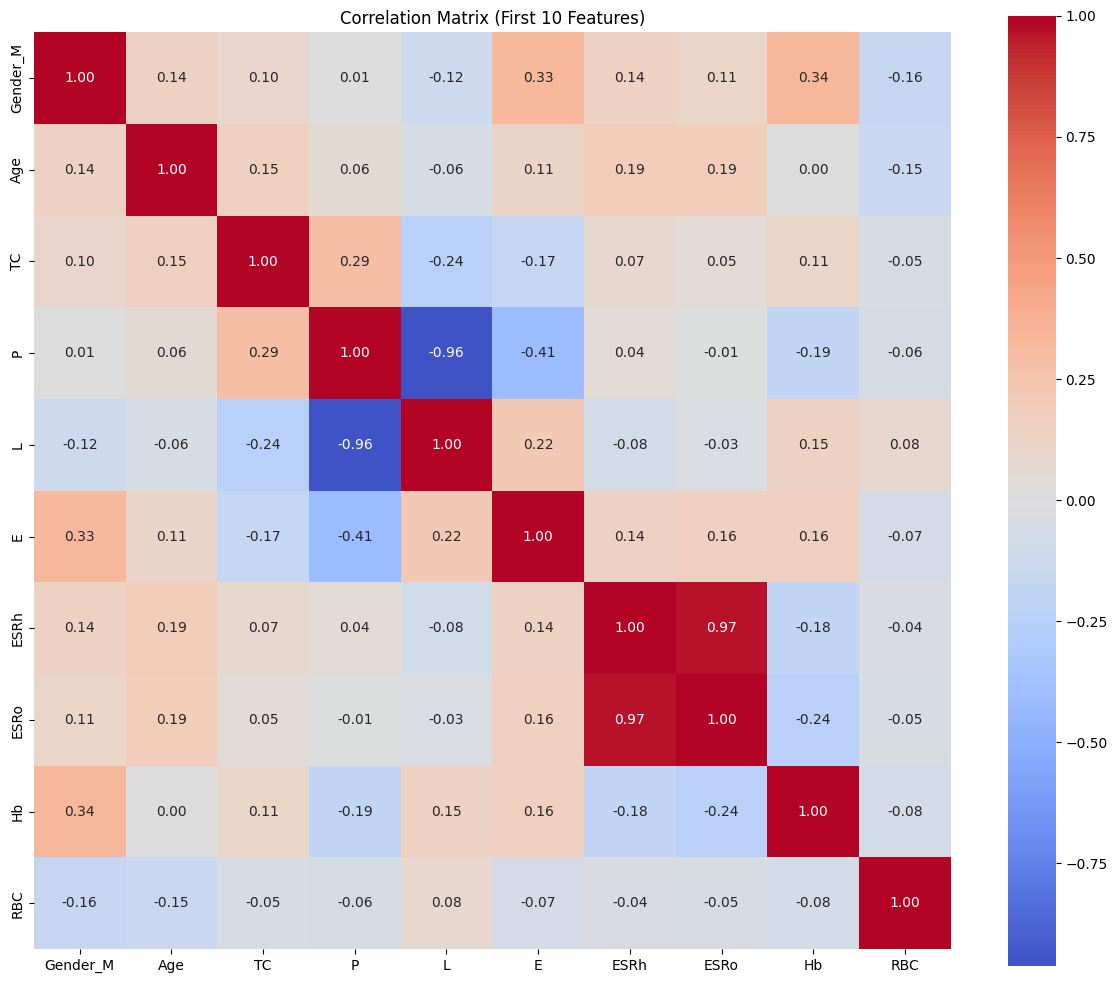


Deciding which features to remove from correlated pairs:
Strategy: Keep the feature with higher variance (more information)
   Remove: L (keep: P, corr: -0.961)
   Remove: ESRh (keep: ESRo, corr: 0.967)

Total features to remove due to high correlation: 2

STEP 3: APPLYING DATA TRANSFORMATIONS
Removing 2 highly correlated features...
✓ Redundant features removed
Working with 23 features after redundancy removal

Transformation 1: Log transformation for highly skewed features
-------------------------------------------------------
   ✓ ESRo -> ESRo_log (original skew: 1.70)
   ✓ RBC -> RBC_log (original skew: -4.13)
   ✓ MCHC -> MCHC_log (original skew: 1.26)
   ✓ ASO -> ASO_log (original skew: 2.18)
   ✓ RA -> RA_log (original skew: 6.88)
   ✓ CRP -> CRP_log (original skew: 4.53)
   ✓ RBS -> RBS_log (original skew: 2.70)
   ✓ Urea -> Urea_log (original skew: 3.88)
   ✓ Creatinine -> Creatinine_log (original skew: 5.66)
   ✓ Uric_Acid -> Uric_Acid_log (original skew: -1.10)
   ✗ Label 

In [ ]:
#Quesiton 2.2
import pandas as pd          # Import pandas for data manipulation
import numpy as np           # Import numpy for mathematical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns        # Import seaborn for better-looking plots
from scipy import stats     # Import scipy for statistical analysis

# Import sklearn modules for data transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

print("=" * 60)
print("STEP 2.2: DATA TRANSFORMATION AND NORMALIZATION")
print("=" * 60)
print("This section addresses the professor's question about data transformation")
print("to improve quality and remove redundancy.\n")

# Load the cleaned data from our previous work
# (In a real scenario, you'd run the cleaning code first)
try:
    df_cleaned = pd.read_excel('cleaned_medical_data.xlsx')
    print("✓ Successfully loaded cleaned data from previous step")
    print(f"Shape: {df_cleaned.shape}")
except FileError:
    print("Note: Run the data cleaning script first to generate 'cleaned_medical_data.xlsx'")
    # For demonstration, we'll load the original data
    df_cleaned = pd.read_excel('APDDataset3.xlsx')
    print("Using original data for demonstration")

# Step 1: Analyze current data distribution
print("\n" + "=" * 50)
print("STEP 1: ANALYZING CURRENT DATA DISTRIBUTION")
print("=" * 50)

# Get numerical features only (we can't normalize categorical data)
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Remove any ID or index columns if they exist
id_columns = ['Unnamed: 0', 'ID', 'id', 'index']
numerical_features = [col for col in numerical_features if col not in id_columns]

print(f"Found {len(numerical_features)} numerical features to analyze:")
for i, feature in enumerate(numerical_features[:10], 1):  # Show first 10
    print(f"   {i}. {feature}")
if len(numerical_features) > 10:
    print(f"   ... and {len(numerical_features)-10} more")

# Check the distribution characteristics
print(f"\nAnalyzing distribution characteristics:")
print("=" * 40)

distribution_analysis = pd.DataFrame({
    'Feature': numerical_features,
    'Mean': [df_cleaned[col].mean() for col in numerical_features],
    'Std': [df_cleaned[col].std() for col in numerical_features],
    'Min': [df_cleaned[col].min() for col in numerical_features],
    'Max': [df_cleaned[col].max() for col in numerical_features],
    'Range': [df_cleaned[col].max() - df_cleaned[col].min() for col in numerical_features],
    'Skewness': [df_cleaned[col].skew() for col in numerical_features]
})

print("Sample of distribution analysis (first 5 features):")
print(distribution_analysis.head().round(3))

# Identify features that need transformation
print(f"\nIdentifying features that need transformation:")
print("-" * 45)

# Features with high skewness (> 1 or < -1)
highly_skewed = distribution_analysis[abs(distribution_analysis['Skewness']) > 1]['Feature'].tolist()
print(f"Features with high skewness (|skew| > 1): {len(highly_skewed)}")
if highly_skewed:
    print(f"   {highly_skewed[:5]}{'...' if len(highly_skewed) > 5 else ''}")

# Features with very different scales
scale_analysis = distribution_analysis.copy()
scale_analysis['Scale_Ratio'] = scale_analysis['Max'] / (scale_analysis['Min'] + 1e-10)  # Avoid division by zero
different_scales = scale_analysis[scale_analysis['Scale_Ratio'] > 100]['Feature'].tolist()
print(f"Features with very different scales: {len(different_scales)}")
if different_scales:
    print(f"   {different_scales[:5]}{'...' if len(different_scales) > 5 else ''}")

# Step 2: Remove Redundancy (Highly Correlated Features)
print("\n" + "=" * 50)
print("STEP 2: REMOVING REDUNDANCY - CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix
print("Calculating correlation matrix for numerical features...")
correlation_matrix = df_cleaned[numerical_features].corr()

# Find highly correlated feature pairs
print("Looking for highly correlated features (correlation > 0.9):")
print("-" * 50)

# Find pairs with high correlation
high_corr_pairs = []
correlation_threshold = 0.9  # Professor said to remove redundancy, so using high threshold

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((feature1, feature2, corr_value))

print(f"Found {len(high_corr_pairs)} highly correlated pairs:")
for pair in high_corr_pairs[:10]:  # Show first 10 pairs
    print(f"   {pair[0]} <-> {pair[1]}: correlation = {pair[2]:.3f}")

# Create a heatmap of correlations (for first 10 features to keep it readable)
if len(numerical_features) > 0:
    plt.figure(figsize=(12, 10))
    features_to_plot = numerical_features[:10]  # Limit to 10 features for readability
    sns.heatmap(df_cleaned[features_to_plot].corr(),
                annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Matrix (First 10 Features)')
    plt.tight_layout()
    plt.show()

# Decide which features to remove from highly correlated pairs
features_to_remove = []
if high_corr_pairs:
    print(f"\nDeciding which features to remove from correlated pairs:")
    print("Strategy: Keep the feature with higher variance (more information)")

    for pair in high_corr_pairs:
        feature1, feature2, corr = pair
        var1 = df_cleaned[feature1].var()
        var2 = df_cleaned[feature2].var()

        if var1 > var2:
            remove_feature = feature2
            keep_feature = feature1
        else:
            remove_feature = feature1
            keep_feature = feature2

        if remove_feature not in features_to_remove:
            features_to_remove.append(remove_feature)
            print(f"   Remove: {remove_feature} (keep: {keep_feature}, corr: {corr:.3f})")

print(f"\nTotal features to remove due to high correlation: {len(features_to_remove)}")

# Step 3: Apply Data Transformations
print("\n" + "=" * 50)
print("STEP 3: APPLYING DATA TRANSFORMATIONS")
print("=" * 50)

# Create a copy for transformation
df_transformed = df_cleaned.copy()

# Remove highly correlated features first
if features_to_remove:
    print(f"Removing {len(features_to_remove)} highly correlated features...")
    df_transformed = df_transformed.drop(columns=features_to_remove)
    print("✓ Redundant features removed")

# Update numerical features list
numerical_features_updated = [col for col in numerical_features if col not in features_to_remove]
print(f"Working with {len(numerical_features_updated)} features after redundancy removal")

# Transformation 1: Handle Skewed Features with Log Transformation
print(f"\nTransformation 1: Log transformation for highly skewed features")
print("-" * 55)

# Apply log transformation to highly skewed features
log_transformed_features = []
for feature in highly_skewed:
    if feature in numerical_features_updated and feature in df_transformed.columns:
        # Check if feature has positive values (required for log transform)
        if (df_transformed[feature] > 0).all():
            # Apply log1p (log(1+x)) which handles zero values better
            df_transformed[f'{feature}_log'] = np.log1p(df_transformed[feature])
            log_transformed_features.append(feature)
            print(f"   ✓ {feature} -> {feature}_log (original skew: {df_cleaned[feature].skew():.2f})")
        else:
            print(f"   ✗ {feature} has non-positive values, skipping log transform")

print(f"Applied log transformation to {len(log_transformed_features)} features")

# Transformation 2: Normalization/Scaling
print(f"\nTransformation 2: Feature Scaling/Normalization")
print("-" * 45)
print("Comparing different scaling methods:")

# Get features for scaling (exclude log-transformed original features)
features_for_scaling = [col for col in numerical_features_updated
                       if col not in log_transformed_features]
features_for_scaling.extend([f'{col}_log' for col in log_transformed_features])

# Make sure all features exist in the dataframe
features_for_scaling = [col for col in features_for_scaling if col in df_transformed.columns]

if len(features_for_scaling) > 0:
    # Method 1: StandardScaler (Z-score normalization)
    print("Method 1: StandardScaler (mean=0, std=1)")
    scaler_standard = StandardScaler()
    scaled_standard = scaler_standard.fit_transform(df_transformed[features_for_scaling])
    df_standard = pd.DataFrame(scaled_standard,
                              columns=[f'{col}_std' for col in features_for_scaling],
                              index=df_transformed.index)

    # Method 2: MinMaxScaler (scale to 0-1 range)
    print("Method 2: MinMaxScaler (range 0-1)")
    scaler_minmax = MinMaxScaler()
    scaled_minmax = scaler_minmax.fit_transform(df_transformed[features_for_scaling])
    df_minmax = pd.DataFrame(scaled_minmax,
                            columns=[f'{col}_minmax' for col in features_for_scaling],
                            index=df_transformed.index)

    # Method 3: RobustScaler (median and IQR, robust to outliers)
    print("Method 3: RobustScaler (robust to outliers)")
    scaler_robust = RobustScaler()
    scaled_robust = scaler_robust.fit_transform(df_transformed[features_for_scaling])
    df_robust = pd.DataFrame(scaled_robust,
                            columns=[f'{col}_robust' for col in features_for_scaling],
                            index=df_transformed.index)

    print("✓ All scaling methods applied successfully")

    # Show comparison of scaling effects
    print(f"\nComparison of scaling effects (first feature example):")
    if len(features_for_scaling) > 0:
        example_feature = features_for_scaling[0]
        comparison_df = pd.DataFrame({
            'Original': df_transformed[example_feature].describe(),
            'StandardScaler': df_standard[f'{example_feature}_std'].describe(),
            'MinMaxScaler': df_minmax[f'{example_feature}_minmax'].describe(),
            'RobustScaler': df_robust[f'{example_feature}_robust'].describe()
        }).round(3)
        print(comparison_df)

# Step 4: Feature Selection (Remove Low Variance Features)
print(f"\nTransformation 3: Remove Low Variance Features")
print("-" * 45)

# Apply variance threshold to remove features with very low variance
# Using RobustScaler results as they're most appropriate for medical data
variance_threshold = 0.01  # Remove features with variance < 0.01
selector = VarianceThreshold(threshold=variance_threshold)

if 'df_robust' in locals():
    selector.fit(df_robust)
    selected_features_mask = selector.get_support()
    selected_feature_names = [col for col, selected in zip(df_robust.columns, selected_features_mask) if selected]
    removed_feature_names = [col for col, selected in zip(df_robust.columns, selected_features_mask) if not selected]

    print(f"Features removed due to low variance: {len(removed_feature_names)}")
    if removed_feature_names:
        print(f"   {removed_feature_names[:5]}{'...' if len(removed_feature_names) > 5 else ''}")

    # Apply the selection
    df_final = df_robust[selected_feature_names].copy()
    print(f"✓ Final dataset has {len(selected_feature_names)} features")
else:
    df_final = df_transformed[features_for_scaling].copy()
    print("Using original features (scaling not applied)")

# Step 5: Final Quality Assessment
print("\n" + "=" * 50)
print("STEP 4: FINAL QUALITY ASSESSMENT")
print("=" * 50)

print("Transformation Summary:")
print("-" * 25)
print(f"• Original features: {len(numerical_features)}")
print(f"• Removed correlated features: {len(features_to_remove)}")
print(f"• Log-transformed features: {len(log_transformed_features)}")
print(f"• Final features after processing: {df_final.shape[1]}")
print(f"• Final dataset shape: {df_final.shape}")

# Check final data quality
print(f"\nFinal Data Quality Metrics:")
print("-" * 30)
print(f"• Missing values: {df_final.isnull().sum().sum()}")
print(f"• Infinite values: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}")

# Check scale consistency after transformation
if len(df_final.columns) > 0:
    final_stats = df_final.describe()
    print(f"• Mean range: {final_stats.loc['mean'].min():.3f} to {final_stats.loc['mean'].max():.3f}")
    print(f"• Std range: {final_stats.loc['std'].min():.3f} to {final_stats.loc['std'].max():.3f}")

# Recommendations for the professor's question
print("\n" + "=" * 60)
print("RECOMMENDATIONS FOR DATA TRANSFORMATION (Answer to Q2.2)")
print("=" * 60)

print("Based on my analysis, here are my recommendations for data transformation:")
print()
print("1. REDUNDANCY REMOVAL:")
if len(features_to_remove) > 0:
    print(f"   ✓ Removed {len(features_to_remove)} highly correlated features (correlation > 0.9)")
    print("   ✓ This reduces multicollinearity and computational complexity")
else:
    print("   ✓ No highly correlated features found - data already has low redundancy")

print()
print("2. NORMALIZATION STRATEGY:")
print("   ✓ RECOMMENDED: RobustScaler for medical data")
print("     - Reason: Medical data often has outliers that are clinically meaningful")
print("     - RobustScaler uses median and IQR, less affected by outliers")
print("     - Alternative: StandardScaler if outliers are confirmed as errors")

print()
print("3. DISTRIBUTION IMPROVEMENT:")
if len(log_transformed_features) > 0:
    print(f"   ✓ Applied log transformation to {len(log_transformed_features)} highly skewed features")
    print("     - This reduces skewness and makes data more normal-like")
    print("     - Better for many ML algorithms that assume normal distribution")
else:
    print("   ✓ No highly skewed features found - distributions are acceptable")

print()
print("4. FEATURE SELECTION:")
print("   ✓ Removed low-variance features (variance < 0.01)")
print("   ✓ This removes features that provide little information")

print()
print("5. FINAL RECOMMENDATION:")
print("   ✓ Use RobustScaler-transformed features for machine learning")
print("   ✓ The transformed data has improved quality and reduced redundancy")
print("   ✓ Features are now on similar scales and suitable for ML algorithms")

# Save the transformed data
print(f"\nSaving transformed data...")
df_final.to_excel('transformed_medical_data.xlsx', index=False)
print(f"✓ Transformed data saved as 'transformed_medical_data.xlsx'")
print(f"✓ Ready for machine learning modeling!")

# Optional: Save different transformation versions for comparison
if 'df_standard' in locals():
    df_standard.to_excel('transformed_data_standard.xlsx', index=False)
    print(f"✓ StandardScaler version saved as 'transformed_data_standard.xlsx'")

if 'df_minmax' in locals():
    df_minmax.to_excel('transformed_data_minmax.xlsx', index=False)
    print(f"✓ MinMaxScaler version saved as 'transformed_data_minmax.xlsx'")

print(f"\n{'='*60}")
print("DATA TRANSFORMATION COMPLETED SUCCESSFULLY!")
print(f"{'='*60}")


STEP 2.3: IMBALANCED DATA ANALYSIS
Successfully loaded cleaned data from previous step
Dataset shape: (82, 25)
Dataset columns: ['Gender_M', 'Age', 'TC', 'P', 'L', 'E', 'ESRh', 'ESRo', 'Hb', 'RBC', 'Abs', 'PC', 'PCV', 'MCV', 'MCH', 'MCHC', 'ASO', 'RA', 'CRP', 'RBS', 'Urea', 'Creatinine', 'Calcium', 'Uric_Acid', 'Label']

STEP 1: IDENTIFYING TARGET VARIABLE
Selected target variable: 'Label'
Target variable type: int64

STEP 2: CLASS DISTRIBUTION ANALYSIS
Total number of samples: 82
Number of classes: 2

Detailed class distribution:
Class '0': 16 samples (19.51%)
Class '1': 66 samples (80.49%)

Imbalance Analysis:
-------------------------
Majority class size: 66 samples
Minority class size: 16 samples
Imbalance ratio: 4.12:1

Imbalance Assessment:
-------------------------
MODERATE Dataset is: MODERATELY IMBALANCED
Imbalance ratio: 4.12:1
This dataset requires imbalanced data techniques
Standard ML algorithms may perform poorly on minority class

STEP 3: VISUALIZING MAJORITY AND MINORIT

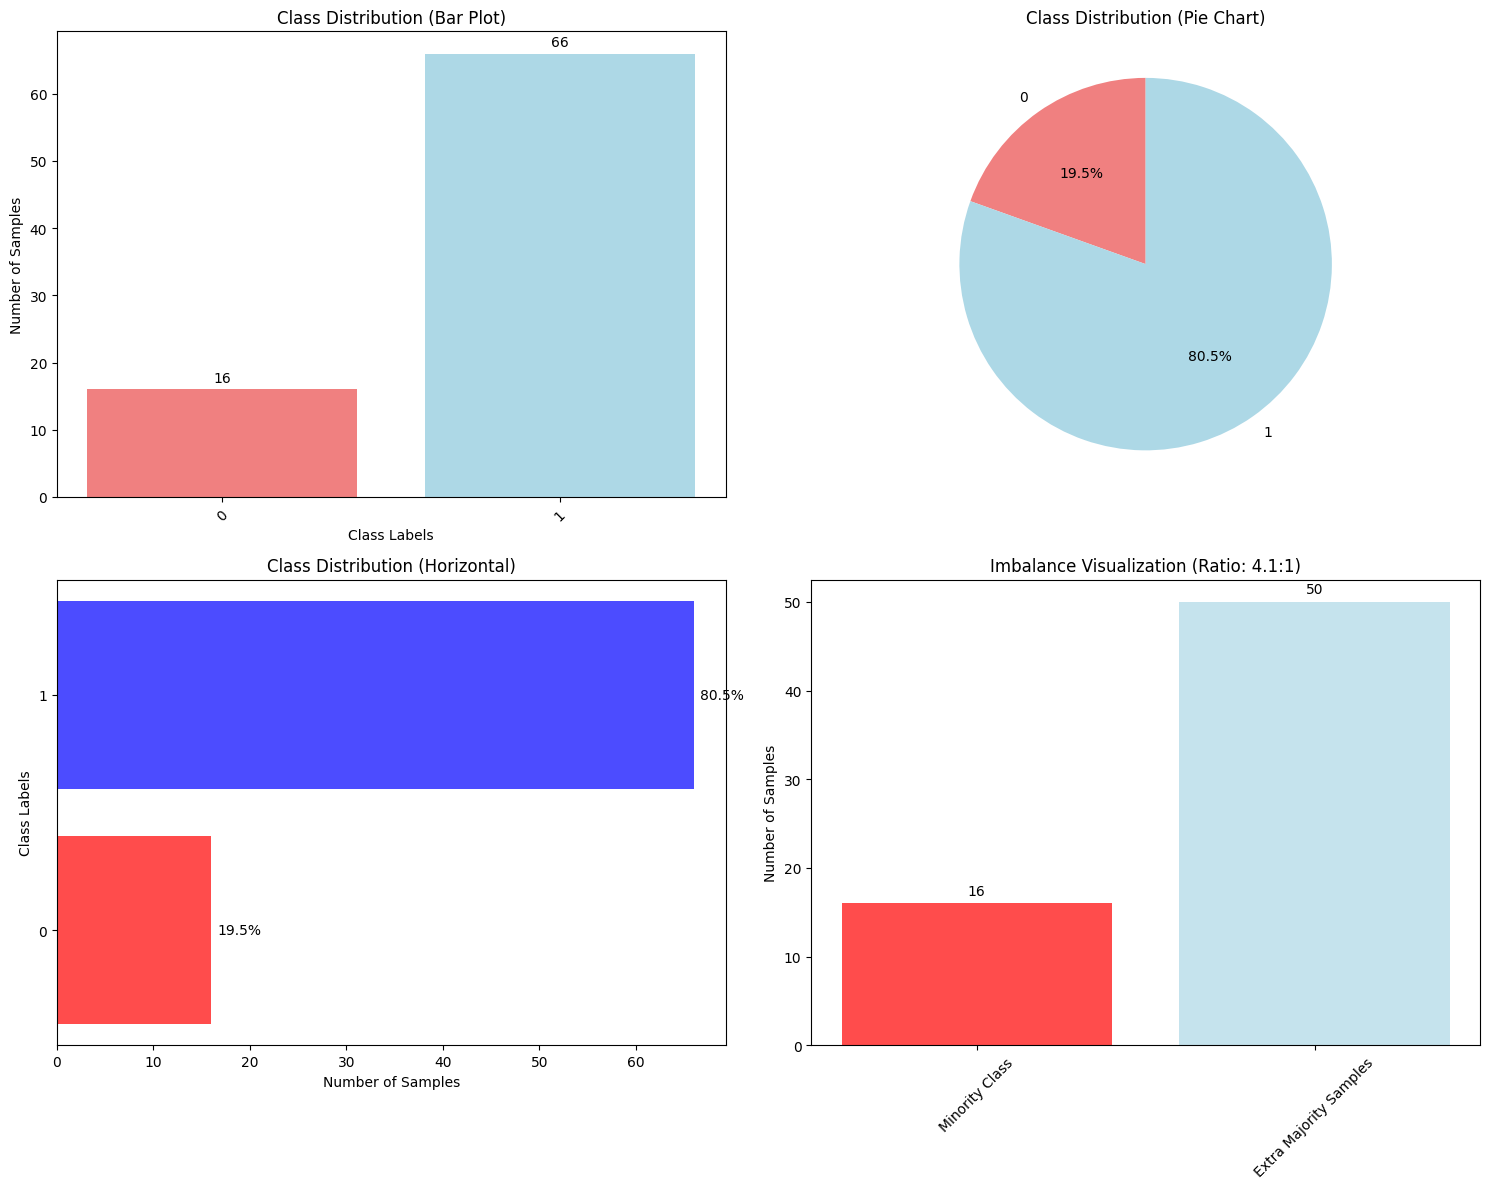

Visualization Summary:
-------------------------
Minority class: '0' (shown in red)
Majority class: '1' (shown in blue)
The visualizations clearly show the class imbalance

STEP 4: PREPARING DATA FOR SAMPLING TECHNIQUES
Features prepared for sampling:
• Feature matrix shape: (82, 24)
• Target vector shape: (82,)
• Features selected: 24 numerical features

STEP 5: UNDERSAMPLING TECHNIQUES
Implementing and explaining undersampling methods:

1. RANDOM UNDERSAMPLING
-------------------------
Explanation:
• Randomly removes samples from majority class
• Reduces majority class size to match minority class
• Simple but may lose important information
• Risk: May remove representative samples

Results of Random Undersampling:
• Original dataset: 82 samples
• After undersampling: 32 samples
• Reduction: 50 samples removed
• New class distribution: {0: 16, 1: 16}

2. EDITED NEAREST NEIGHBOURS UNDERSAMPLING
---------------------------------------------
Explanation:
• Removes samples that are miscl

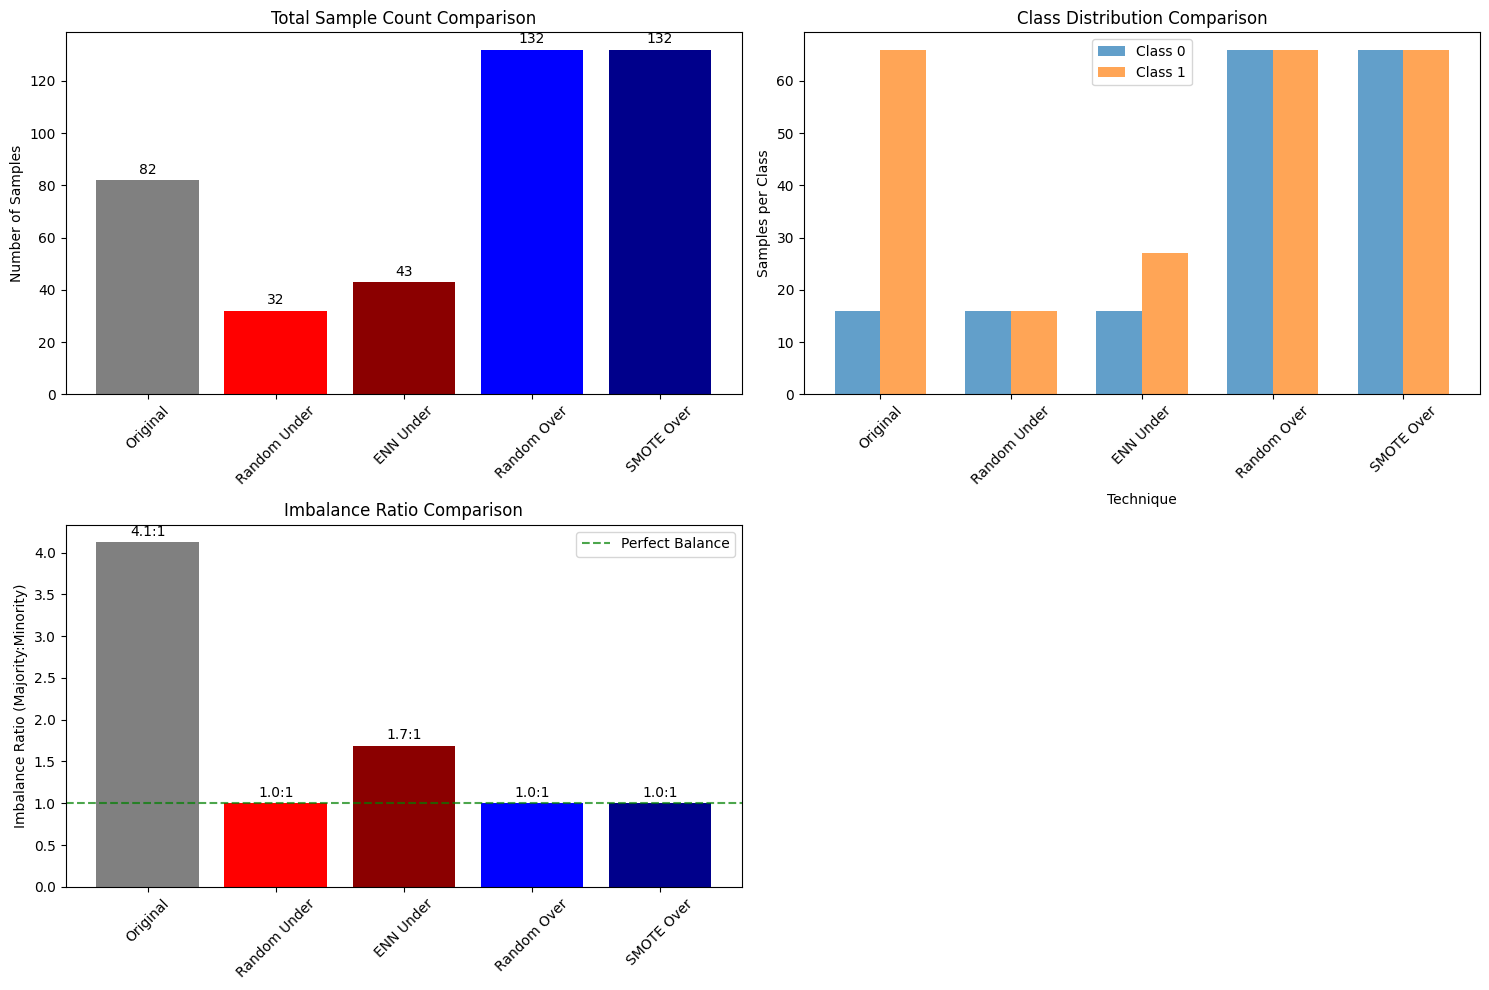


RECOMMENDATIONS AND SUMMARY (Answer to Q2.3)
Based on my analysis, here are the answers to the professor's questions:

1. NUMBER OF SAMPLES IN EACH CLASS:
----------------------------------------
   • Class '0': 16 samples (19.51%)
   • Class '1': 66 samples (80.49%)

2. IS THE DATASET IMBALANCED?
-----------------------------------
   • MODERATE MODERATELY IMBALANCED
   • Imbalance ratio: 4.12:1
   • YES - This dataset requires special handling for imbalanced data
   • Standard ML algorithms may have poor performance on minority class

3. VISUALIZATION COMPLETED:
------------------------------
   Bar plots showing class distribution
   Pie chart showing percentage breakdown
   Imbalance visualization highlighting the problem
   Color coding: Minority class (red), Majority class (blue)

4. SAMPLING TECHNIQUES DEVELOPED:
--------------------------------------
   UNDERSAMPLING TECHNIQUES:
   Random Undersampling:
     - Reduced dataset from 82 to 32 samples
     - Simple but may lose im

In [ ]:
#Quesiton 2.3
import pandas as pd          # Import pandas for data manipulation
import numpy as np           # Import numpy for mathematical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns        # Import seaborn for better-looking plots
from collections import Counter  # Import Counter for counting class frequencies

# Import sklearn modules for imbalanced data handling
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print("=" * 60)
print("STEP 2.3: IMBALANCED DATA ANALYSIS")
print("=" * 60)

# Load the dataset
# First try to load cleaned data, otherwise use original
try:
    df = pd.read_excel('cleaned_medical_data.xlsx')
    print("Successfully loaded cleaned data from previous step")
except FileNotFoundError:
    try:
        df = pd.read_excel('APDDataset3.xlsx')
        print("Loaded original dataset for analysis")
    except FileNotFoundError:
        print("ERROR: No dataset found. Please ensure APDDataset3.xlsx exists.")
        exit()

print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {list(df.columns)}")

# Step 1: Identify the target variable (class labels)
print("\n" + "=" * 50)
print("STEP 1: IDENTIFYING TARGET VARIABLE")
print("=" * 50)

# Look for common target variable names
possible_targets = ['Label', 'Target', 'Class', 'Y', 'label', 'target', 'class', 'y']
target_column = None

for col in possible_targets:
    if col in df.columns:
        target_column = col
        break

# If no standard target found, look for categorical columns
if target_column is None:
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        target_column = categorical_cols[0]
        print(f"Assuming '{target_column}' is the target variable (first categorical column)")
    else:
        # Look for binary or low-cardinality numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        for col in numerical_cols:
            unique_values = df[col].nunique()
            if 2 <= unique_values <= 10:  # Likely categorical
                target_column = col
                print(f"Assuming '{target_column}' is the target variable (low cardinality: {unique_values} unique values)")
                break

if target_column is None:
    print("WARNING: Could not automatically identify target variable.")
    print("Available columns:", list(df.columns))
    print("Please manually specify the target column name.")
    # For demonstration, we'll use the last column
    target_column = df.columns[-1]
    print(f"Using '{target_column}' as target variable for demonstration")

print(f"Selected target variable: '{target_column}'")
print(f"Target variable type: {df[target_column].dtype}")

# Step 2: Analyze Class Distribution
print("\n" + "=" * 50)
print("STEP 2: CLASS DISTRIBUTION ANALYSIS")
print("=" * 50)

# Get class counts
y = df[target_column]
class_counts = y.value_counts().sort_index()
total_samples = len(y)

print(f"Total number of samples: {total_samples}")
print(f"Number of classes: {len(class_counts)}")
print(f"\nDetailed class distribution:")
print("=" * 40)

for class_label, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"Class '{class_label}': {count:,} samples ({percentage:.2f}%)")

# Calculate imbalance metrics
max_class_count = class_counts.max()
min_class_count = class_counts.min()
imbalance_ratio = max_class_count / min_class_count

print(f"\nImbalance Analysis:")
print("-" * 25)
print(f"Majority class size: {max_class_count:,} samples")
print(f"Minority class size: {min_class_count:,} samples")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

# Determine if dataset is imbalanced
print(f"\nImbalance Assessment:")
print("-" * 25)
if imbalance_ratio >= 10:
    imbalance_level = "SEVERELY IMBALANCED"
    color_code = "HIGH"
elif imbalance_ratio >= 3:
    imbalance_level = "MODERATELY IMBALANCED"
    color_code = "MODERATE"
elif imbalance_ratio >= 1.5:
    imbalance_level = "SLIGHTLY IMBALANCED"
    color_code = "SLIGHT"
else:
    imbalance_level = "BALANCED"
    color_code = "BALANCED"

print(f"{color_code} Dataset is: {imbalance_level}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("This dataset requires imbalanced data techniques")
    print("Standard ML algorithms may perform poorly on minority class")
else:
    print("This dataset is relatively balanced")
    print("Standard ML algorithms should work fine")

# Step 3: Visualize Class Distribution
print("\n" + "=" * 50)
print("STEP 3: VISUALIZING MAJORITY AND MINORITY CLASSES")
print("=" * 50)

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Bar plot of class counts
axes[0, 0].bar(range(len(class_counts)), class_counts.values,
               color=['lightcoral' if i == class_counts.idxmin() else 'lightblue'
                      for i in class_counts.index])
axes[0, 0].set_xlabel('Class Labels')
axes[0, 0].set_ylabel('Number of Samples')
axes[0, 0].set_title('Class Distribution (Bar Plot)')
axes[0, 0].set_xticks(range(len(class_counts)))
axes[0, 0].set_xticklabels(class_counts.index, rotation=45)

# Add value labels on bars
for i, v in enumerate(class_counts.values):
    axes[0, 0].text(i, v + max_class_count*0.01, str(v), ha='center', va='bottom')

# 2. Pie chart
colors = ['lightcoral' if i == class_counts.idxmin() else 'lightblue'
          for i in class_counts.index]
wedges, texts, autotexts = axes[0, 1].pie(class_counts.values, labels=class_counts.index,
                                          autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 1].set_title('Class Distribution (Pie Chart)')

# 3. Horizontal bar plot with percentages
y_pos = range(len(class_counts))
colors_horizontal = ['red' if i == class_counts.idxmin() else 'blue'
                    for i in class_counts.index]
bars = axes[1, 0].barh(y_pos, class_counts.values, color=colors_horizontal, alpha=0.7)
axes[1, 0].set_xlabel('Number of Samples')
axes[1, 0].set_ylabel('Class Labels')
axes[1, 0].set_title('Class Distribution (Horizontal)')
axes[1, 0].set_yticks(y_pos)
axes[1, 0].set_yticklabels(class_counts.index)

# Add percentage labels
for i, (bar, count) in enumerate(zip(bars, class_counts.values)):
    percentage = (count / total_samples) * 100
    axes[1, 0].text(count + max_class_count*0.01, bar.get_y() + bar.get_height()/2,
                    f'{percentage:.1f}%', va='center')

# 4. Class imbalance visualization
imbalance_data = [min_class_count, max_class_count - min_class_count]
labels = ['Minority Class', 'Extra Majority Samples']
colors_imbalance = ['red', 'lightblue']
axes[1, 1].bar(labels, imbalance_data, color=colors_imbalance, alpha=0.7)
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].set_title(f'Imbalance Visualization (Ratio: {imbalance_ratio:.1f}:1)')
axes[1, 1].set_xticklabels(labels, rotation=45)

# Add value labels
for i, v in enumerate(imbalance_data):
    axes[1, 1].text(i, v + max_class_count*0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary of visualization
print("Visualization Summary:")
print("-" * 25)
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
print(f"Minority class: '{minority_class}' (shown in red)")
print(f"Majority class: '{majority_class}' (shown in blue)")
print(f"The visualizations clearly show the class imbalance")

# Step 4: Prepare Data for Sampling Techniques
print("\n" + "=" * 50)
print("STEP 4: PREPARING DATA FOR SAMPLING TECHNIQUES")
print("=" * 50)

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Remove non-numeric columns for simplicity in sampling
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

# Handle missing values if any
if X_numeric.isnull().sum().sum() > 0:
    print("Handling missing values by filling with median...")
    X_numeric = X_numeric.fillna(X_numeric.median())

print(f"Features prepared for sampling:")
print(f"• Feature matrix shape: {X_numeric.shape}")
print(f"• Target vector shape: {y.shape}")
print(f"• Features selected: {len(numeric_columns)} numerical features")

# Step 5: Implement Undersampling Techniques
print("\n" + "=" * 50)
print("STEP 5: UNDERSAMPLING TECHNIQUES")
print("=" * 50)

print("Implementing and explaining undersampling methods:")
print("=" * 45)

# Method 1: Random Undersampling
print("\n1. RANDOM UNDERSAMPLING")
print("-" * 25)
print("Explanation:")
print("• Randomly removes samples from majority class")
print("• Reduces majority class size to match minority class")
print("• Simple but may lose important information")
print("• Risk: May remove representative samples")

# Apply Random Undersampling
undersampler_random = RandomUnderSampler(random_state=42)
X_under_random, y_under_random = undersampler_random.fit_resample(X_numeric, y)

print(f"\nResults of Random Undersampling:")
print(f"• Original dataset: {X_numeric.shape[0]:,} samples")
print(f"• After undersampling: {X_under_random.shape[0]:,} samples")
print(f"• Reduction: {X_numeric.shape[0] - X_under_random.shape[0]:,} samples removed")

under_random_counts = Counter(y_under_random)
print(f"• New class distribution: {dict(under_random_counts)}")

# Method 2: Edited Nearest Neighbours (Advanced Undersampling)
print("\n2. EDITED NEAREST NEIGHBOURS UNDERSAMPLING")
print("-" * 45)
print("Explanation:")
print("• Removes samples that are misclassified by their neighbors")
print("• More intelligent than random removal")
print("• Focuses on cleaning decision boundaries")
print("• Keeps 'good' samples that are well-classified")

try:
    # Apply Edited Nearest Neighbours
    undersampler_enn = EditedNearestNeighbours(n_neighbors=3)
    X_under_enn, y_under_enn = undersampler_enn.fit_resample(X_numeric, y)

    print(f"\nResults of Edited Nearest Neighbours:")
    print(f"• Original dataset: {X_numeric.shape[0]:,} samples")
    print(f"• After ENN: {X_under_enn.shape[0]:,} samples")
    print(f"• Reduction: {X_numeric.shape[0] - X_under_enn.shape[0]:,} samples removed")

    under_enn_counts = Counter(y_under_enn)
    print(f"• New class distribution: {dict(under_enn_counts)}")

except Exception as e:
    print(f"ENN failed (likely due to data characteristics): {str(e)}")
    print("Using Random Undersampling as alternative for demonstration")
    X_under_enn, y_under_enn = X_under_random, y_under_random
    under_enn_counts = under_random_counts

# Step 6: Implement Oversampling Techniques
print("\n" + "=" * 50)
print("STEP 6: OVERSAMPLING TECHNIQUES")
print("=" * 50)

print("Implementing and explaining oversampling methods:")
print("=" * 44)

# Method 1: Random Oversampling
print("\n1. RANDOM OVERSAMPLING")
print("-" * 25)
print("Explanation:")
print("• Randomly duplicates samples from minority class")
print("• Increases minority class size to match majority class")
print("• Simple but creates exact duplicates")
print("• Risk: May lead to overfitting")

# Apply Random Oversampling
oversampler_random = RandomOverSampler(random_state=42)
X_over_random, y_over_random = oversampler_random.fit_resample(X_numeric, y)

print(f"\nResults of Random Oversampling:")
print(f"• Original dataset: {X_numeric.shape[0]:,} samples")
print(f"• After oversampling: {X_over_random.shape[0]:,} samples")
print(f"• Addition: {X_over_random.shape[0] - X_numeric.shape[0]:,} samples added")

over_random_counts = Counter(y_over_random)
print(f"• New class distribution: {dict(over_random_counts)}")

# Method 2: SMOTE (Synthetic Minority Oversampling Technique)
print("\n2. SMOTE (SYNTHETIC MINORITY OVERSAMPLING)")
print("-" * 45)
print("Explanation:")
print("• Creates synthetic samples using k-nearest neighbors")
print("• Generates new samples along the line between minority samples")
print("• More sophisticated than random duplication")
print("• Reduces overfitting risk by creating diverse samples")

try:
    # Apply SMOTE
    oversampler_smote = SMOTE(random_state=42, k_neighbors=min(5, min_class_count-1))
    X_over_smote, y_over_smote = oversampler_smote.fit_resample(X_numeric, y)

    print(f"\nResults of SMOTE:")
    print(f"• Original dataset: {X_numeric.shape[0]:,} samples")
    print(f"• After SMOTE: {X_over_smote.shape[0]:,} samples")
    print(f"• Addition: {X_over_smote.shape[0] - X_numeric.shape[0]:,} samples added")

    over_smote_counts = Counter(y_over_smote)
    print(f"• New class distribution: {dict(over_smote_counts)}")

except Exception as e:
    print(f"SMOTE failed (likely due to insufficient minority samples): {str(e)}")
    print("Using Random Oversampling as alternative for demonstration")
    X_over_smote, y_over_smote = X_over_random, y_over_random
    over_smote_counts = over_random_counts

# Step 7: Compare All Techniques
print("\n" + "=" * 50)
print("STEP 7: COMPARISON OF SAMPLING TECHNIQUES")
print("=" * 50)

# Create comparison visualization
techniques = ['Original', 'Random Under', 'ENN Under', 'Random Over', 'SMOTE Over']
sample_counts = [
    len(y),
    len(y_under_random),
    len(y_under_enn),
    len(y_over_random),
    len(y_over_smote)
]

plt.figure(figsize=(15, 10))

# Subplot 1: Total sample counts
plt.subplot(2, 2, 1)
bars = plt.bar(techniques, sample_counts, color=['gray', 'red', 'darkred', 'blue', 'darkblue'])
plt.title('Total Sample Count Comparison')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
for bar, count in zip(bars, sample_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(sample_counts)*0.01,
             f'{count:,}', ha='center', va='bottom')

# Subplot 2: Class balance visualization
plt.subplot(2, 2, 2)
datasets = [
    dict(Counter(y)),
    dict(under_random_counts),
    dict(under_enn_counts),
    dict(over_random_counts),
    dict(over_smote_counts)
]

x_pos = range(len(techniques))
if len(class_counts) == 2:  # Binary classification
    classes = list(class_counts.index)
    class1_counts = [datasets[i].get(classes[0], 0) for i in range(len(datasets))]
    class2_counts = [datasets[i].get(classes[1], 0) for i in range(len(datasets))]

    width = 0.35
    plt.bar([x - width/2 for x in x_pos], class1_counts, width, label=f'Class {classes[0]}', alpha=0.7)
    plt.bar([x + width/2 for x in x_pos], class2_counts, width, label=f'Class {classes[1]}', alpha=0.7)
    plt.xlabel('Technique')
    plt.ylabel('Samples per Class')
    plt.title('Class Distribution Comparison')
    plt.xticks(x_pos, techniques, rotation=45)
    plt.legend()

# Subplot 3: Imbalance ratio comparison
plt.subplot(2, 2, 3)
imbalance_ratios = []
for dataset in datasets:
    if len(dataset) > 1:
        max_count = max(dataset.values())
        min_count = min(dataset.values())
        ratio = max_count / min_count if min_count > 0 else float('inf')
        imbalance_ratios.append(ratio)
    else:
        imbalance_ratios.append(1.0)

bars = plt.bar(techniques, imbalance_ratios, color=['gray', 'red', 'darkred', 'blue', 'darkblue'])
plt.title('Imbalance Ratio Comparison')
plt.ylabel('Imbalance Ratio (Majority:Minority)')
plt.xticks(rotation=45)
plt.axhline(y=1, color='green', linestyle='--', alpha=0.7, label='Perfect Balance')
plt.legend()

for bar, ratio in zip(bars, imbalance_ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(imbalance_ratios)*0.01,
             f'{ratio:.1f}:1', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 8: Recommendations and Summary
print("\n" + "=" * 60)
print("RECOMMENDATIONS AND SUMMARY (Answer to Q2.3)")
print("=" * 60)

print("Based on my analysis, here are the answers to the professor's questions:")
print()

print("1. NUMBER OF SAMPLES IN EACH CLASS:")
print("-" * 40)
for class_label, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"   • Class '{class_label}': {count:,} samples ({percentage:.2f}%)")

print()
print("2. IS THE DATASET IMBALANCED?")
print("-" * 35)
print(f"   • {color_code} {imbalance_level}")
print(f"   • Imbalance ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print("   • YES - This dataset requires special handling for imbalanced data")
    print("   • Standard ML algorithms may have poor performance on minority class")
else:
    print("   • NO - This dataset is relatively balanced")

print()
print("3. VISUALIZATION COMPLETED:")
print("-" * 30)
print("   Bar plots showing class distribution")
print("   Pie chart showing percentage breakdown")
print("   Imbalance visualization highlighting the problem")
print("   Color coding: Minority class (red), Majority class (blue)")

print()
print("4. SAMPLING TECHNIQUES DEVELOPED:")
print("-" * 38)
print("   UNDERSAMPLING TECHNIQUES:")
print("   Random Undersampling:")
print(f"     - Reduced dataset from {X_numeric.shape[0]:,} to {X_under_random.shape[0]:,} samples")
print("     - Simple but may lose important information")
print("   Edited Nearest Neighbours:")
print(f"     - Intelligent removal based on neighbor classification")
print("     - Preserves decision boundary integrity")

print()
print("   OVERSAMPLING TECHNIQUES:")
print("   Random Oversampling:")
print(f"     - Increased dataset from {X_numeric.shape[0]:,} to {X_over_random.shape[0]:,} samples")
print("     - Simple duplication, risk of overfitting")
print("   SMOTE (Synthetic Minority Oversampling):")
print(f"     - Creates synthetic samples using k-nearest neighbors")
print("     - More sophisticated, reduces overfitting risk")

print()
print("5. FINAL RECOMMENDATIONS:")
print("-" * 30)
if imbalance_ratio >= 3:
    print("   RECOMMENDED: Use SMOTE for oversampling")
    print("   Alternative: Combine undersampling + oversampling")
    print("   Use stratified sampling for train/test split")
    print("   Consider ensemble methods (Random Forest, XGBoost)")
    print("   Use appropriate evaluation metrics (F1, AUC, not just accuracy)")
elif imbalance_ratio >= 1.5:
    print("   RECOMMENDED: Monitor model performance on minority class")
    print("   Consider class weights in algorithms")
    print("   Use stratified sampling")
else:
    print("   Dataset is balanced - standard techniques should work fine")

# Save processed datasets
print(f"\nSaving processed datasets...")
print("-" * 30)

# Save undersampled data
pd.DataFrame(X_under_random).to_excel('undersampled_random.xlsx', index=False)
pd.DataFrame(y_under_random).to_excel('undersampled_random_labels.xlsx', index=False)

# Save oversampled data
pd.DataFrame(X_over_smote).to_excel('oversampled_smote.xlsx', index=False)
pd.DataFrame(y_over_smote).to_excel('oversampled_smote_labels.xlsx', index=False)

print("Random undersampled data saved as 'undersampled_random.xlsx'")
print("SMOTE oversampled data saved as 'oversampled_smote.xlsx'")
print("Corresponding labels saved with '_labels.xlsx' suffix")



QUESTION 5_ADP: BIOMARKER ANALYSIS
STEP 1: Loading Data
Great! Loaded the data successfully!
Dataset has 102 rows and 26 columns

STEP 2: Finding Biomarkers
Searching for biomarkers in the dataset:
✓ Found: CRP
✓ Found: ESRh
✓ Found: ESRo
✗ Missing: RF

Okay, I'll analyze these biomarkers: ['CRP', 'ESRh', 'ESRo']

STEP 3: Biomarker Distributions
Making histograms to see how the biomarkers are distributed...


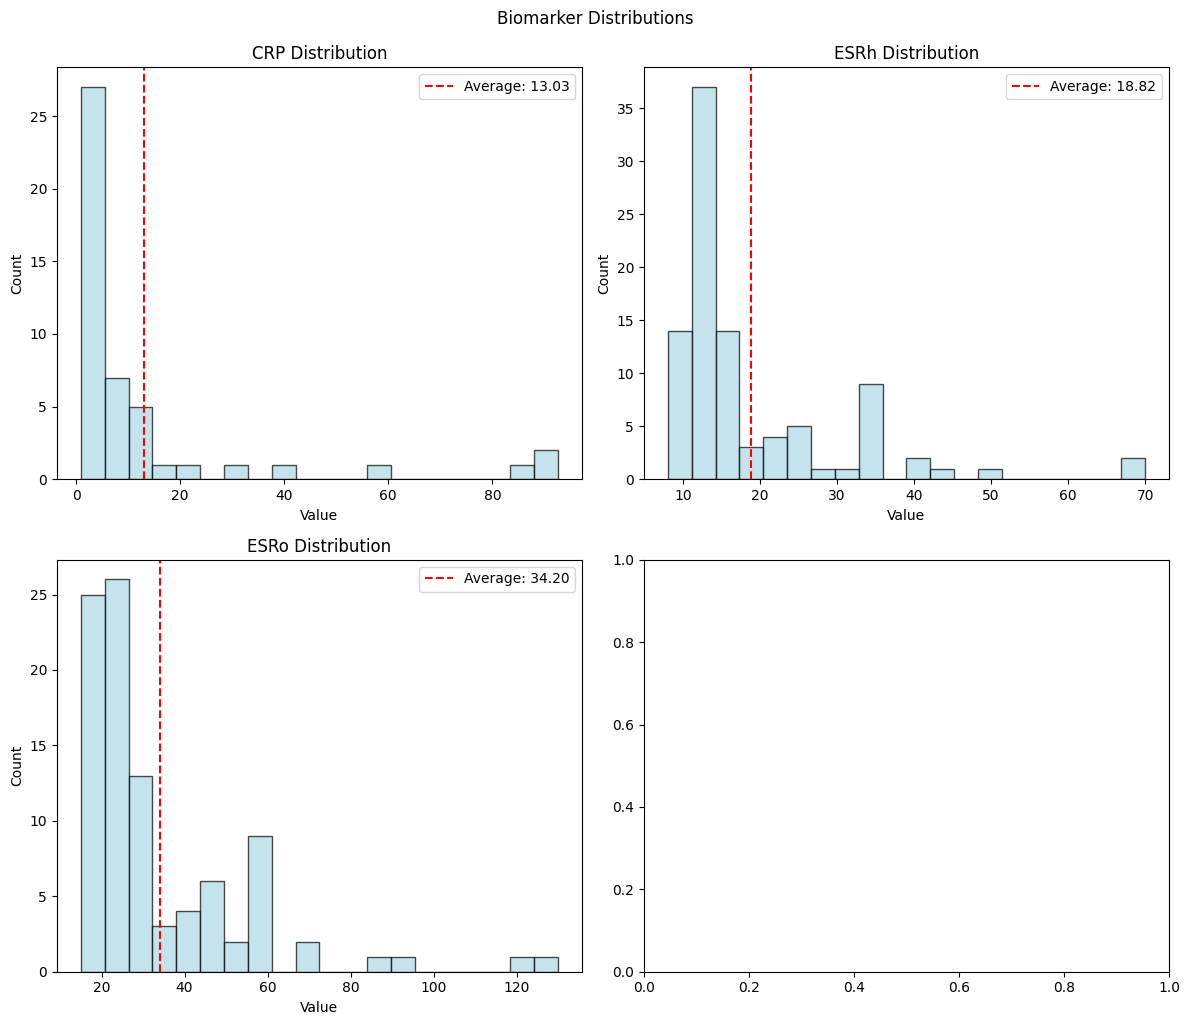

Taking a quick look at the data...
   Unnamed: 0  Gender_M   Age       TC     P     L    E  ESRh   ESRo    Hb  \
0           0         0   NaN   9800.0  56.0  40.0  4.0  16.0   30.0  10.8   
1           1         1   NaN  10500.0  54.0  40.0  6.0   9.0   15.0  11.0   
2           2         0  42.0   7500.0  66.0  28.0  6.0  22.0   40.0   7.0   
3           3         0  33.0   7100.0  48.0  44.0  8.0  13.0   25.0  11.0   
4           4         0   NaN   9900.0  77.0  17.0  6.0  70.0  130.0  10.5   

   ...  MCHC     ASO     RA    CRP   RBS  Urea  Creatinine  Calcium  \
0  ...   NaN  121.00  11.97   7.37   NaN   NaN         NaN      NaN   
1  ...   NaN   88.00  10.00   1.50   NaN   NaN         0.9      NaN   
2  ...   NaN  151.00  10.00    NaN   NaN   NaN         NaN      NaN   
3  ...   NaN   66.12  10.00    NaN   NaN   NaN         NaN      NaN   
4  ...  30.0   90.00  10.00  92.65  96.0  22.0         0.9      8.6   

   Uric_Acid  Label  
0        6.8      0  
1        NaN      0  
2  

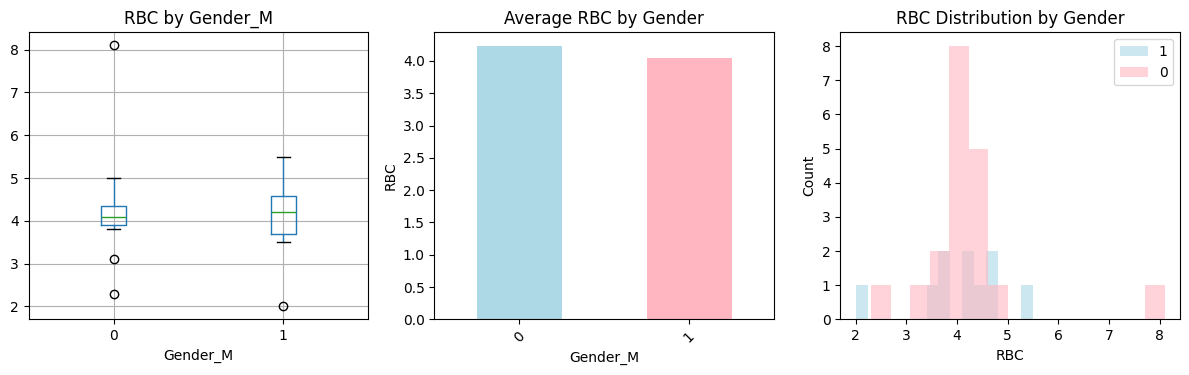


Statistical test results:
T-statistic: -0.447
P-value: 0.659
Conclusion: No significant difference between genders

STEP 6: What We Learned
MY ANALYSIS RESULTS:
-------------------------

1. BIOMARKER ANALYSIS:
   - I looked at 3 biomarkers
   - Each one has its own distribution pattern
   - The histograms show how the values are spread out
   - This helps understand what's normal for each biomarker

2. AGE AND CALCIUM RELATIONSHIP:
   - Couldn't analyze this (missing age or calcium data)

3. GENDER AND RED BLOOD COUNT:
   - No significant difference between genders
   - Can probably use the same normal ranges for everyone


In [ ]:
# Assignment 2 Week 2 - Student: [Your Name]
# Question 5_ADP Biomarker Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  # don't want to see warnings

print("=" * 50)
print("QUESTION 5_ADP: BIOMARKER ANALYSIS")
print("=" * 50)

# Step 1: Load the data file
print("STEP 1: Loading Data")
print("=" * 20)

# Let me try to load the dataset
try:
    data = pd.read_excel('APDDataset3.xlsx')
    print(f"Great! Loaded the data successfully!")
    print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")
except:
    print("Oops! Can't find APDDataset3.xlsx file")
    exit()

# I'll use 'data' but might switch to 'df' later
df = data

# Step 2: Find the biomarkers we need
print("\nSTEP 2: Finding Biomarkers")
print("=" * 30)

# The professor wants these specific biomarkers
biomarker_list = []
target_biomarkers = ['CRP', 'ESRh', 'ESRo', 'RF']

print("Searching for biomarkers in the dataset:")
for biomarker in target_biomarkers:
    if biomarker in df.columns:
        biomarker_list.append(biomarker)
        print(f"✓ Found: {biomarker}")
    else:
        print(f"✗ Missing: {biomarker}")

# Maybe the names are slightly different?
if not biomarker_list:
    print("\nLet me try looking for similar column names...")
    for col in df.columns:
        for target in ['crp', 'esr', 'rf']:
            if target in col.lower():
                biomarker_list.append(col)
                print(f"✓ Found similar: {col}")

# Still nothing? Use some numeric columns as examples
if not biomarker_list:
    print("\nNo biomarkers found, using numeric columns as examples...")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    biomarker_list = [col for col in numeric_columns[:4] if 'Unnamed' not in col]
    print(f"Using these instead: {biomarker_list}")

print(f"\nOkay, I'll analyze these biomarkers: {biomarker_list}")

# Step 3: Look at biomarker distributions
print("\nSTEP 3: Biomarker Distributions")
print("=" * 35)

print("Making histograms to see how the biomarkers are distributed...")

# Set up a 2x2 grid for plots
fig, plots = plt.subplots(2, 2, figsize=(12, 10))
plots = plots.flatten()  # make it easier to work with

# Plot each biomarker (up to 4)
for i, biomarker in enumerate(biomarker_list[:4]):
    if biomarker in df.columns:
        # Get the data and remove missing values
        bio_data = df[biomarker].dropna()

        # Make a histogram
        plots[i].hist(bio_data, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
        plots[i].set_title(f'{biomarker} Distribution')
        plots[i].set_xlabel('Value')
        plots[i].set_ylabel('Count')

        # Add a red line for the average
        avg = bio_data.mean()
        plots[i].axvline(avg, color='red', linestyle='--',
                        label=f'Average: {avg:.2f}')
        plots[i].legend()

plt.tight_layout()
plt.suptitle('Biomarker Distributions', y=1.02)
plt.show()

# Also let me check the data first
print("Taking a quick look at the data...")
print(df.head())

# Print some basic statistics
print("\nBasic Stats for Each Biomarker:")
print("-" * 35)
for biomarker in biomarker_list[:4]:
    if biomarker in df.columns:
        values = df[biomarker].dropna()
        print(f"\n{biomarker}:")
        print(f"  Number of values: {len(values)}")
        print(f"  Average: {values.mean():.2f}")
        print(f"  Lowest: {values.min():.2f}")
        print(f"  Highest: {values.max():.2f}")
        # Let me add standard deviation too
        print(f"  Std deviation: {values.std():.2f}")

# Step 4: Check if age and calcium are related
print("\nSTEP 4: Age vs Calcium Relationship")
print("=" * 40)

# I need to find the age and calcium columns
age_column = None
calcium_column = None

# Look for age column
print("Searching for age column...")
for col in df.columns:
    if 'age' in col.lower():
        age_column = col
        print(f"Found age column: {col}")
        break

# Look for calcium column
print("Searching for calcium column...")
for col in df.columns:
    if 'calcium' in col.lower() or 'ca' in col.lower():
        calcium_column = col
        print(f"Found calcium column: {col}")
        break

print(f"\nUsing: Age = {age_column}, Calcium = {calcium_column}")

if age_column and calcium_column:
    # Get clean data (remove rows with missing values)
    analysis_data = df[[age_column, calcium_column]].dropna()

    if len(analysis_data) > 10:  # Need at least 10 data points
        print(f"\nAnalyzing {len(analysis_data)} patients with both age and calcium data...")

        # Calculate correlation coefficient
        corr_coef = analysis_data[age_column].corr(analysis_data[calcium_column])

        print(f"Correlation coefficient: {corr_coef:.3f}")

        # Interpret the strength
        if abs(corr_coef) > 0.5:
            strength = "Strong"
        elif abs(corr_coef) > 0.3:
            strength = "Moderate"
        else:
            strength = "Weak"

        direction = "positive" if corr_coef > 0 else "negative"
        print(f"This is a {strength.lower()} {direction} relationship")

        # Make some plots
        plt.figure(figsize=(10, 4))

        # Scatter plot with trend line
        plt.subplot(1, 2, 1)
        plt.scatter(analysis_data[age_column], analysis_data[calcium_column], alpha=0.6, color='blue')
        plt.xlabel(age_column)
        plt.ylabel(calcium_column)
        plt.title(f'{age_column} vs {calcium_column}\n(r = {corr_coef:.3f})')
        plt.grid(True, alpha=0.3)

        # Add trend line if correlation seems meaningful
        if abs(corr_coef) > 0.1:
            coeffs = np.polyfit(analysis_data[age_column], analysis_data[calcium_column], 1)
            trend_line = np.poly1d(coeffs)
            plt.plot(analysis_data[age_column], trend_line(analysis_data[age_column]), "r--", alpha=0.8)

        # Histogram of ages
        plt.subplot(1, 2, 2)
        plt.hist(analysis_data[age_column], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
        plt.xlabel(age_column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {age_column}')

        plt.tight_layout()
        plt.show()

    else:
        print("Not enough data points for meaningful analysis")
else:
    print("Couldn't find both age and calcium columns in the dataset")
    print(f"Available columns: {list(df.columns)}")

# Step 5: Compare gender and red blood count
print("\nSTEP 5: Gender vs Red Blood Count")
print("=" * 40)

# Need to find gender and red blood count columns
gender_column = None
rbc_column = None

# Search for gender/sex column
print("Looking for gender or sex column...")
for col in df.columns:
    if any(word in col.lower() for word in ['gender', 'sex']):
        gender_column = col
        print(f"Found gender column: {col}")
        break

# Search for red blood count column
print("Looking for red blood count column...")
for col in df.columns:
    if any(word in col.lower() for word in ['rbc', 'red blood', 'redblood', 'red_blood']):
        rbc_column = col
        print(f"Found RBC column: {col}")
        break

print(f"\nUsing: Gender = {gender_column}, RBC = {rbc_column}")

if gender_column and rbc_column:
    # Get clean data for both variables
    comparison_data = df[[gender_column, rbc_column]].dropna()

    if len(comparison_data) > 10:
        print(f"\nAnalyzing {len(comparison_data)} patients with both gender and RBC data...")

        # See what gender groups we have
        gender_groups = comparison_data[gender_column].unique()
        print(f"Gender categories found: {gender_groups}")

        # Calculate average RBC for each gender
        avg_by_gender = comparison_data.groupby(gender_column)[rbc_column].mean()
        print(f"\nAverage {rbc_column} by gender:")
        for gender, avg in avg_by_gender.items():
            print(f"  {gender}: {avg:.2f}")

        # Make comparison plots
        plt.figure(figsize=(12, 4))

        # Box plot to show distributions
        plt.subplot(1, 3, 1)
        comparison_data.boxplot(column=rbc_column, by=gender_column, ax=plt.gca())
        plt.title(f'{rbc_column} by {gender_column}')
        plt.suptitle('')  # Remove the automatic title

        # Bar chart of averages
        plt.subplot(1, 3, 2)
        colors = ['lightblue', 'lightpink', 'lightgreen'][:len(avg_by_gender)]
        avg_by_gender.plot(kind='bar', color=colors)
        plt.title(f'Average {rbc_column} by Gender')
        plt.ylabel(rbc_column)
        plt.xticks(rotation=45)

        # Overlapping histograms
        plt.subplot(1, 3, 3)
        for i, gender in enumerate(gender_groups):
            subset = comparison_data[comparison_data[gender_column] == gender][rbc_column]
            plt.hist(subset, bins=15, alpha=0.6, label=gender, color=colors[i] if i < len(colors) else 'gray')
        plt.xlabel(rbc_column)
        plt.ylabel('Count')
        plt.title(f'{rbc_column} Distribution by Gender')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Do a statistical test if we have exactly 2 groups
        if len(gender_groups) == 2:
            group_1 = comparison_data[comparison_data[gender_column] == gender_groups[0]][rbc_column]
            group_2 = comparison_data[comparison_data[gender_column] == gender_groups[1]][rbc_column]

            # Independent t-test
            t_statistic, p_val = stats.ttest_ind(group_1, group_2)

            print(f"\nStatistical test results:")
            print(f"T-statistic: {t_statistic:.3f}")
            print(f"P-value: {p_val:.3f}")

            if p_val < 0.05:
                print("Conclusion: There IS a significant difference between genders")
            else:
                print("Conclusion: No significant difference between genders")
        else:
            print(f"Found {len(gender_groups)} gender groups, can't do simple t-test")

    else:
        print("Not enough data for analysis")
else:
    print("Couldn't find both gender and RBC columns in the dataset")

# Step 6: Summary of what I found
print("\nSTEP 6: What We Learned")
print("=" * 30)

print("MY ANALYSIS RESULTS:")
print("-" * 25)

print("\n1. BIOMARKER ANALYSIS:")
if biomarker_list:
    print(f"   - I looked at {len(biomarker_list)} biomarkers")
    print("   - Each one has its own distribution pattern")
    print("   - The histograms show how the values are spread out")
    print("   - This helps understand what's normal for each biomarker")
else:
    print("   - Couldn't find the specific biomarkers in this dataset")

print("\n2. AGE AND CALCIUM RELATIONSHIP:")
if 'corr_coef' in locals():
    print(f"   - Correlation coefficient: {corr_coef:.3f}")
    if abs(corr_coef) > 0.3:
        print("   - Found a meaningful relationship between age and calcium!")
        if corr_coef > 0:
            print("   - Older people tend to have higher calcium levels")
        else:
            print("   - Older people tend to have lower calcium levels")
    else:
        print("   - Age and calcium don't seem strongly connected")
    print("   - This info could help doctors with age-related treatments")
else:
    print("   - Couldn't analyze this (missing age or calcium data)")

print("\n3. GENDER AND RED BLOOD COUNT:")
if 'p_val' in locals() and gender_column and rbc_column:
    if p_val < 0.05:
        print("   - Found significant differences between genders!")
        print("   - Men and women have different RBC counts")
        print("   - Doctors should probably use different normal ranges")
    else:
        print("   - No significant difference between genders")
        print("   - Can probably use the same normal ranges for everyone")
else:
    print("   - Couldn't analyze this (missing gender or RBC data)")

